In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/cats_vs_dogs_small_dataset\ \(3\).zip

In [ ]:
!unzip /content/drive/MyDrive/train\ \(1\).zip

In [ ]:
!unzip /content/drive/MyDrive/test1\ \(1\).zip

**Q1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?**








Moving pictures to the test, validation, and training directories

In [11]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_dataset")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=667, end_index=1667)
make_subset("validation", start_index=1668, end_index=2168)
make_subset("test", start_index=2169, end_index=2669)

"Picture reading with "image_dataset_from_directory"

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation= image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test= image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

With a NumPy array containing 1000 random samples and a vector size of 16, create an instance of the dataset.

In [13]:
import numpy as np
import tensorflow as tf
random_num = np.random.normal(size=(1000, 16))
data = tf.data.Dataset.from_tensor_slices(random_num)

In [14]:
for i, element in enumerate(data):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [15]:
batchdata = data.batch(32)
for i, element in enumerate(batchdata):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [16]:
reshapedata = data.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshapedata):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Creating the model

Building a small network to separate dogs from cats

In [17]:
for data_batch, labels_batch in train:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [19]:
from tensorflow import keras
from tensorflow.keras import layers

input = keras.Input(shape=(180, 180, 3))
a = layers.Rescaling(1./255)(input)
a = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(a)
a = layers.MaxPooling2D(pool_size=2)(a)
a = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(a)
a = layers.Flatten()(a)
a = layers.Dropout(0.5)(a)
output1 = layers.Dense(1, activation="sigmoid")(a)
model1 = keras.Model(inputs=input, outputs=output1)

Setting up the model for training

In [20]:
model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

We design the model first, and then train it with the training dataset. At the end of each epoch, we use the validation dataset to assess the model's performance. I'm using GPU to shorten each epoch's execution time.

In [21]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

Model fitting is carried out using the dataset.

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

callback1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model1.fit(
    train,
    epochs=10,
    validation_data=validation,
    callbacks=callback1)

Epoch 1/10
63/63 [==============================] - 16s 132ms/step - loss: 0.6946 - accuracy: 0.5095 - val_loss: 0.6930 - val_accuracy: 0.5030
Epoch 2/10
63/63 [==============================] - 4s 58ms/step - loss: 0.6887 - accuracy: 0.5370 - val_loss: 0.6902 - val_accuracy: 0.5170
Epoch 3/10
63/63 [==============================] - 4s 57ms/step - loss: 0.6759 - accuracy: 0.5530 - val_loss: 0.6818 - val_accuracy: 0.5700
Epoch 4/10
63/63 [==============================] - 6s 84ms/step - loss: 0.6715 - accuracy: 0.6010 - val_loss: 0.6830 - val_accuracy: 0.6000
Epoch 5/10
63/63 [==============================] - 7s 111ms/step - loss: 0.6342 - accuracy: 0.6345 - val_loss: 0.6761 - val_accuracy: 0.5890
Epoch 6/10
63/63 [==============================] - 4s 59ms/step - loss: 0.6047 - accuracy: 0.6750 - val_loss: 0.6648 - val_accuracy: 0.6650
Epoch 7/10
63/63 [==============================] - 4s 58ms/step - loss: 0.5937 - accuracy: 0.6855 - val_loss: 0.6565 - val_accuracy: 0.6550
Epoch 8/10

During training, loss and accuracy curves were created for improved visualization and understanding.

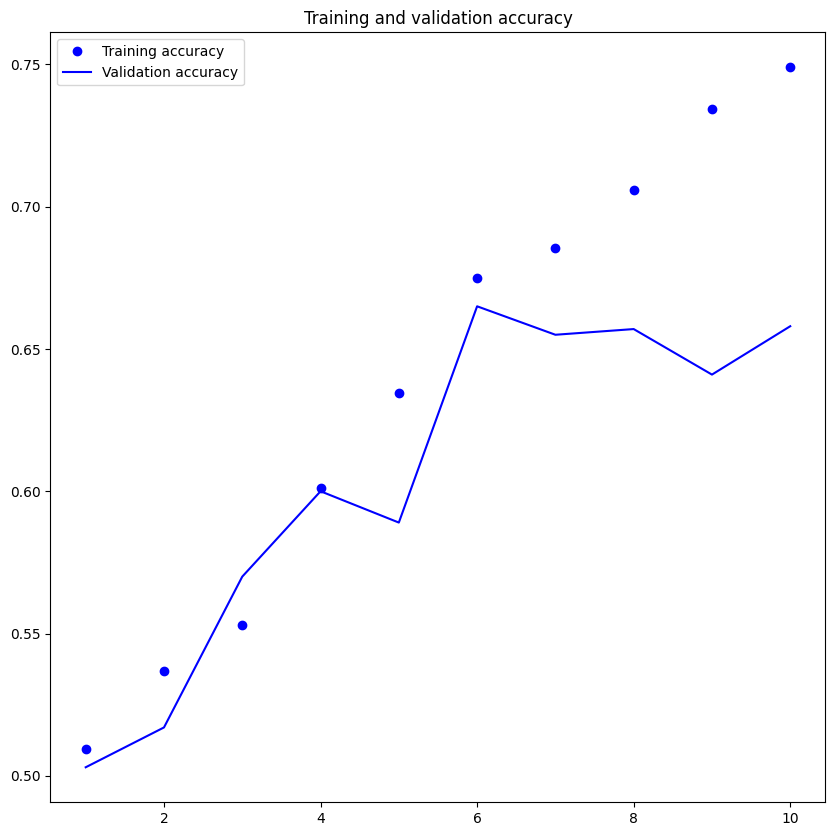

<Figure size 640x480 with 0 Axes>

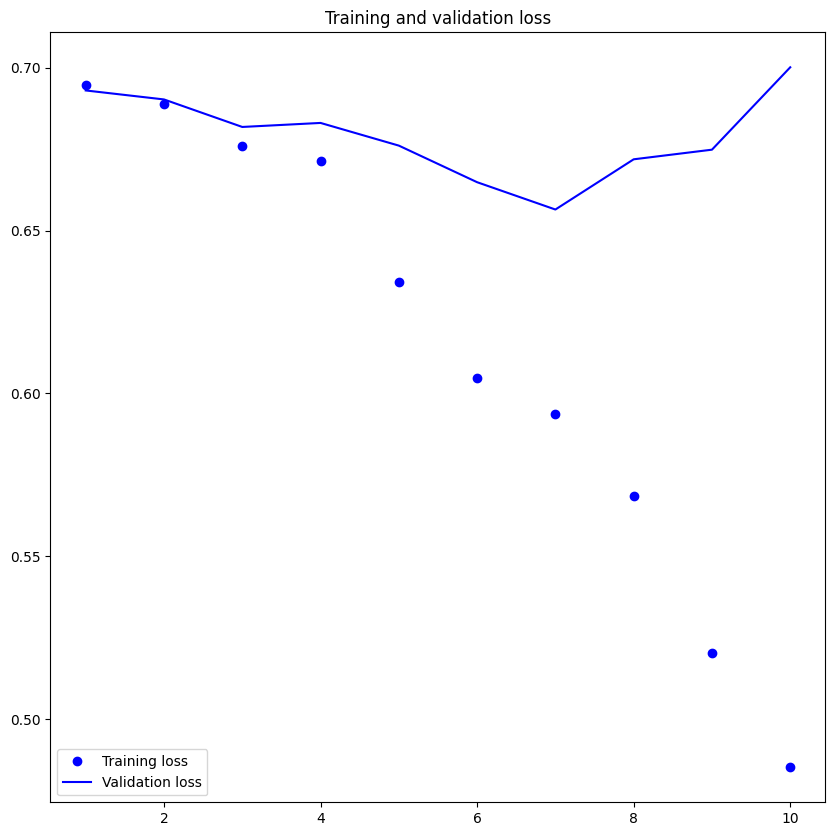

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy1 = history1.history["accuracy"]
val_accuracy1 = history1.history["val_accuracy"]
loss1 = history1.history["loss"]
val_loss1 = history1.history["val_loss"]
epochs = range(1, len(accuracy1) + 1)
plt.plot(epochs, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss1, "bo", label="Training loss")
plt.plot(epochs, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [24]:
testacc1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = testacc1.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 57ms/step - loss: 0.6374 - accuracy: 0.6550
Test accuracy: 0.655


Based on the results mentioned above, we can conclude that the test accuracy without data augmentation is approximately 69.7%, but the training accuracy is approximately 92%.
**Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?**

Utilizing data augmentation

Define a data augmentation stage to include in an image model.

In [25]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2167)
make_subset("validation", start_index=2168, end_index=2668)
make_subset("test", start_index=2669, end_index=3168)

In [26]:
augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Demonstrating the training augmented images


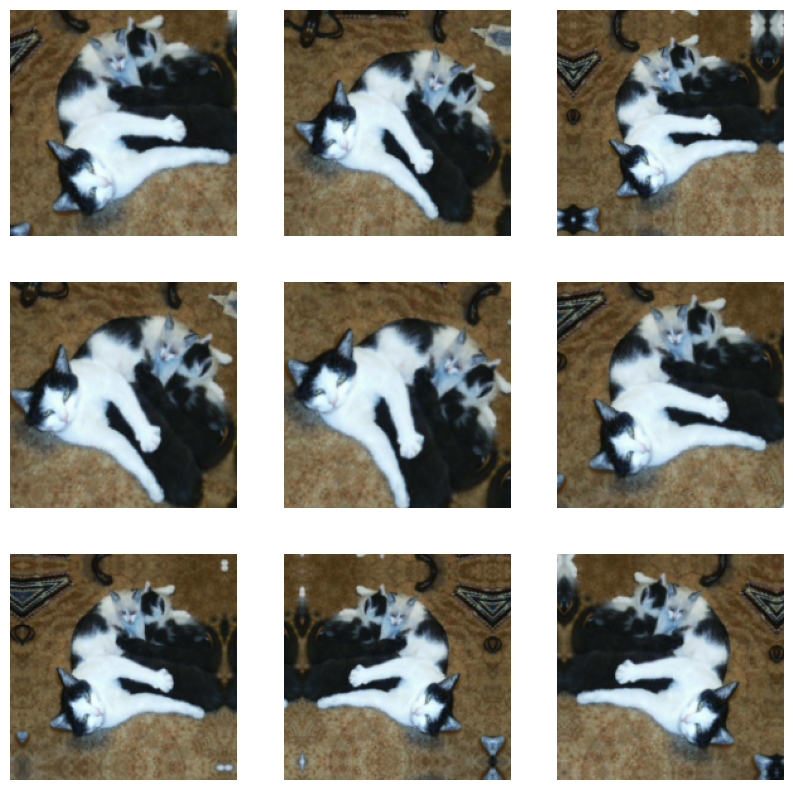

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
    for i in range(9):
        augmented_pics = augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_pics[0].numpy().astype("uint8"))
        plt.axis("off")

Developing a new convolutional neural network with dropout and image augmentation

In [28]:
input2 = keras.Input(shape=(180, 180, 3))
b = augmentation(input2)
b = layers.Rescaling(1./255)(b)
b = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(b)
b = layers.MaxPooling2D(pool_size=2)(b)
b = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(b)
b = layers.MaxPooling2D(pool_size=2)(b)
b = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(b)
b = layers.MaxPooling2D(pool_size=2)(b)
b = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(b)
b = layers.MaxPooling2D(pool_size=2)(b)
b = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(b)
b = layers.Flatten()(b)
b = layers.Dropout(0.5)(b)
output2 = layers.Dense(1, activation="sigmoid")(b)
model2 = keras.Model(inputs=input2, outputs=output2)

model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history2 = model2.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callback2)

Epoch 1/30
63/63 [==============================] - 8s 91ms/step - loss: 0.6970 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 7s 104ms/step - loss: 0.6941 - accuracy: 0.5095 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 4s 58ms/step - loss: 0.6941 - accuracy: 0.5005 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 6s 84ms/step - loss: 0.6912 - accuracy: 0.5040 - val_loss: 0.6925 - val_accuracy: 0.4960
Epoch 5/30
63/63 [==============================] - 4s 58ms/step - loss: 0.6955 - accuracy: 0.4940 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/30
63/63 [==============================] - 4s 58ms/step - loss: 0.6936 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5180
Epoch 7/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6932 - accuracy: 0.4940 - val_loss: 0.6929 - val_accuracy: 0.5510
Epoch 8/30
6

The model has been assessed using a test set.

In [30]:
testacc2 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = testacc2.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 49ms/step - loss: 0.6763 - accuracy: 0.5640
Test accuracy: 0.564


**Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.**

Step 3 required using test sets consisting of 500 samples and 2000 training samples with validation. I discovered that test accuracy is higher with 1500 images than with 1000 or 2000 training samples.

Training accuracy improves with 1,000 training samples.

Increasing the training sample to 2000 while keeping the validation and test sets at 500 samples.

In [31]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2667)
make_subset("validation", start_index=2668, end_index=3168)
make_subset("test", start_index=3169, end_index=3669)

A new neural network with more training samples, picture augmentation, and dropout

In [32]:
i3 = keras.Input(shape=(180, 180, 3))
c = augmentation(i3)
c = layers.Rescaling(1./255)(c)
c = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(c)
c = layers.MaxPooling2D(pool_size=2)(c)
c = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(c)
c = layers.MaxPooling2D(pool_size=2)(c)
c = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(c)
c = layers.MaxPooling2D(pool_size=2)(c)
c = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(c)
c = layers.MaxPooling2D(pool_size=2)(c)
c = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(c)
c = layers.Flatten()(c)
c = layers.Dropout(0.5)(c)
out3 = layers.Dense(1, activation="sigmoid")(c)
mod3 = keras.Model(inputs=i3, outputs=out3)

mod3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [33]:
callback3 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist3 = mod3.fit(
    train,
    epochs=50,
    validation_data=validation,
    callbacks=callback3)

Epoch 1/50
63/63 [==============================] - 8s 63ms/step - loss: 0.6962 - accuracy: 0.5015 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 4s 59ms/step - loss: 0.6923 - accuracy: 0.5280 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 6s 89ms/step - loss: 0.6936 - accuracy: 0.5035 - val_loss: 0.6928 - val_accuracy: 0.5120
Epoch 4/50
63/63 [==============================] - 7s 103ms/step - loss: 0.6934 - accuracy: 0.4995 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 5/50
63/63 [==============================] - 4s 62ms/step - loss: 0.6909 - accuracy: 0.5335 - val_loss: 0.6861 - val_accuracy: 0.5050
Epoch 6/50
63/63 [==============================] - 5s 71ms/step - loss: 0.6869 - accuracy: 0.5380 - val_loss: 0.6934 - val_accuracy: 0.5010
Epoch 7/50
63/63 [==============================] - 8s 118ms/step - loss: 0.6906 - accuracy: 0.5380 - val_loss: 0.6814 - val_accuracy: 0.5780
Epoch 8/50


In [34]:
acc_test3 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = acc_test3.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 28ms/step - loss: 0.4646 - accuracy: 0.8080
Test accuracy: 0.808


**Q4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.**



Implementing the VGG16 convolutional base

In [35]:
convolution_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [36]:
convolution_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Removing data augmentation and extracting features using a pretrained model
Acquiring the labels corresponding to the VGG16 features

In [37]:
import numpy as np

def get_features_and_labels(dataset):
    all_feature = []
    all_label = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_base.predict(preprocessed_images)
        all_feature.append(features)
        all_label.append(labels)
    return np.concatenate(all_feature), np.concatenate(all_label)

train_features, train_labels =  get_features_and_labels(train)
val_features, val_labels =  get_features_and_labels(validation)
test_features, test_labels =  get_features_and_labels(test)

1/1 [==============================] - 0s 20ms/step


In [38]:
train_features.shape

(2000, 5, 5, 512)

In [39]:
i6 = keras.Input(shape=(5, 5, 512))
d = layers.Flatten()(i6)
d = layers.Dense(256)(d)
d = layers.Dropout(0.5)(d)
out6 = layers.Dense(1, activation="sigmoid")(d)
m6 = keras.Model(i6, out6)
m6.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callback6 = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
hist6 = m6.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callback6)

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 19.6159 - accuracy: 0.9260 - val_loss: 7.0408 - val_accuracy: 0.9410
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 3.9870 - accuracy: 0.9735 - val_loss: 3.2211 - val_accuracy: 0.9770
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 2.5029 - accuracy: 0.9840 - val_loss: 7.9894 - val_accuracy: 0.9600
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9572 - accuracy: 0.9895 - val_loss: 9.1236 - val_accuracy: 0.9610
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.8924 - accuracy: 0.9935 - val_loss: 3.8398 - val_accuracy: 0.9810
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.6610 - accuracy: 0.9950 - val_loss: 6.8978 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.5662 - accuracy: 0.9945 - val_loss: 4.5445 - val_accuracy: 0.9770
Epoch 8/20
63/63 

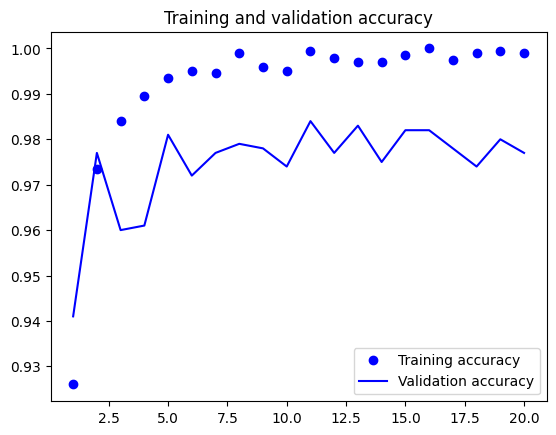

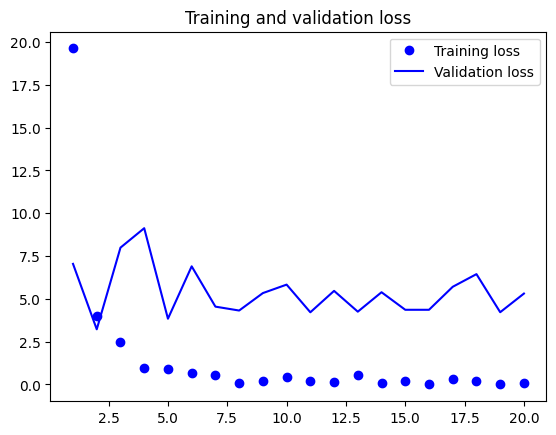

In [40]:
import matplotlib.pyplot as plt
accuracy6 = hist6.history["accuracy"]
valaccuracy6 = hist6.history["val_accuracy"]
los6 = hist6.history["loss"]
vallos6 = hist6.history["val_loss"]
epochs = range(1, len(accuracy6) + 1)
plt.plot(epochs, accuracy6, "bo", label="Training accuracy")
plt.plot(epochs, valaccuracy6, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, los6, "bo", label="Training loss")
plt.plot(epochs, vallos6, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Instantiation and freezing of the VGG16 convolutional base

In [41]:
convolution_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolution_base.trainable = False

convolution_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convolution_base.trainable_weights))

convolution_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convolution_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


With a classifier and argumentation to convolution basis, the model is now operating.

In [42]:
augmentation2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

input22 = keras.Input(shape=(180, 180, 3))
x1 = augmentation2(input22)
x1 =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x1)
x1 = convolution_base(x1)
x1 = layers.Flatten()(x1)
x1 = layers.Dense(256)(x1)
x1 = layers.Dropout(0.5)(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model = keras.Model(input22, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])




In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    callbacks=callbacks
)

Epoch 1/10
63/63 [==============================] - 12s 162ms/step - loss: 18.1699 - accuracy: 0.8920 - val_loss: 2.5942 - val_accuracy: 0.9780
Epoch 2/10
63/63 [==============================] - 11s 176ms/step - loss: 6.9346 - accuracy: 0.9375 - val_loss: 2.8699 - val_accuracy: 0.9760
Epoch 3/10
63/63 [==============================] - 12s 185ms/step - loss: 5.8636 - accuracy: 0.9550 - val_loss: 2.0955 - val_accuracy: 0.9810
Epoch 4/10
63/63 [==============================] - 11s 178ms/step - loss: 3.6924 - accuracy: 0.9630 - val_loss: 2.4746 - val_accuracy: 0.9780
Epoch 5/10
63/63 [==============================] - 10s 151ms/step - loss: 3.1880 - accuracy: 0.9700 - val_loss: 3.6771 - val_accuracy: 0.9780
Epoch 6/10
63/63 [==============================] - 10s 150ms/step - loss: 3.7240 - accuracy: 0.9645 - val_loss: 1.8774 - val_accuracy: 0.9790
Epoch 7/10
63/63 [==============================] - 11s 180ms/step - loss: 3.0318 - accuracy: 0.9665 - val_loss: 2.2420 - val_accuracy: 0.977

In [44]:
test_model = keras.models.load_model(
    "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = test_model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 91ms/step - loss: 4.6764 - accuracy: 0.9710
Test accuracy: 0.971


Improving a pretrained model's accuracy

All layers being frozen up until the fourth from the bottom

In [45]:
convolution_base.trainable = True
for layer in convolution_base.layers[:-4]:
    layer.trainable = False

In [46]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbackstu = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
historytune = model.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callbackstu)

Epoch 1/30
63/63 [==============================] - 15s 187ms/step - loss: 1.0912 - accuracy: 0.9805 - val_loss: 2.3944 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 13s 202ms/step - loss: 1.5096 - accuracy: 0.9770 - val_loss: 1.8633 - val_accuracy: 0.9790
Epoch 3/30
63/63 [==============================] - 12s 174ms/step - loss: 0.9194 - accuracy: 0.9860 - val_loss: 1.7759 - val_accuracy: 0.9790
Epoch 4/30
63/63 [==============================] - 11s 167ms/step - loss: 0.7922 - accuracy: 0.9835 - val_loss: 2.0488 - val_accuracy: 0.9740
Epoch 5/30
63/63 [==============================] - 11s 166ms/step - loss: 0.6853 - accuracy: 0.9845 - val_loss: 1.7092 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 11s 166ms/step - loss: 0.7609 - accuracy: 0.9860 - val_loss: 1.8547 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 11s 166ms/step - loss: 0.6719 - accuracy: 0.9855 - val_loss: 1.7317 - val_accuracy: 0.9800

In [47]:
model_tuning = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 87ms/step - loss: 1.8284 - accuracy: 0.9730
Test accuracy: 0.973
